<a href="https://colab.research.google.com/github/Uttam580/New_learning-/blob/master/Image_classification_autogluon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Here we assume CUDA 10.0 is installed.  You should change the number
# according to your own CUDA version (e.g. mxnet-cu101 for CUDA 10.1).
! pip install mxnet-cu101
! pip install autogluon 

In [1]:
import autogluon as ag
from autogluon import ObjectDetection as task

/usr/local/lib/python3.6/dist-packages/mxnet/optimizer/optimizer.py:167: UserWarning: WARNING: New optimizer gluonnlp.optimizer.lamb.LAMB is overriding existing optimizer mxnet.optimizer.optimizer.LAMB
  Optimizer.opt_registry[name].__name__))


In [2]:
root = './'
filename_zip = ag.download('https://autogluon.s3.amazonaws.com/datasets/tiny_motorbike.zip',
                        path=root)
filename = ag.unzip(filename_zip, root=root)

In [3]:
! ls

dask-worker-space  sample_data	tiny_motorbike	tiny_motorbike.zip


In [4]:
import os
data_root = os.path.join(root, filename)
dataset_train = task.Dataset(data_root, classes=('motorbike',))

>>> create dataset(VOC format) 


. We use mobilenet as the backbone for the YOLO3 model. Two different learning rates are used to fine-tune the network

Starting Experiments
Num of Finished Tasks is 0
Num of Pending Tasks is 2
Time out (secs) is 20


scheduler: FIFOScheduler(
DistributedResourceManager{
(Remote: Remote REMOTE_ID: 0, 
	<Remote: 'inproc://172.28.0.2/301/1' processes=1 threads=2, memory=13.65 GB>, Resource: NodeResourceManager(2 CPUs, 1 GPUs))
})



Model file not found. Downloading.


88993KB [00:03, 27210.37KB/s]                           
{'meta_arch': 'yolo3', 'dataset': <autogluon.task.object_detection.dataset.voc.CustomVOCDetection object at 0x7f459366a7f0>, 'net': 'mobilenet1.0', 'lr': 0.0005, 'loss': SoftmaxCrossEntropyLoss(batch_axis=0, w=None), 'num_gpus': 1, 'batch_size': 16, 'split_ratio': 0.8, 'epochs': 30, 'num_workers': 2, 'hybridize': True, 'verbose': False, 'final_fit': False, 'seed': 223, 'data_shape': 416, 'start_epoch': 0, 'transfer': 'coco', 'lr_mode': 'step', 'lr_decay': 0.1, 'lr_decay_period': 0, 'lr_decay_epoch': '160,180', 'warmup_lr': 0.0, 'warmup_epochs': 2, 'warmup_iters': 1000, 'warmup_factor': 0.3333333333333333, 'momentum': 0.9, 'wd': 0.0005, 'log_interval': 100, 'save_prefix': 'yolo3_mobilenet1.0_custom', 'save_interval': 10, 'val_interval': 1, 'num_samples': -1, 'no_random_shape': False, 'no_wd': False, 'mixup': False, 'no_mixup_epochs': 20, 'label_smooth': False, 'resume': '', 'syncbn': False, 'reuse_pred_weights': True, 'task_id': 0

{'meta_arch': 'yolo3', 'dataset': <autogluon.task.object_detection.dataset.voc.CustomVOCDetection object at 0x7f45936bcc50>, 'net': 'mobilenet1.0', 'lr': 0.0001, 'loss': SoftmaxCrossEntropyLoss(batch_axis=0, w=None), 'num_gpus': 1, 'batch_size': 16, 'split_ratio': 0.8, 'epochs': 30, 'num_workers': 2, 'hybridize': True, 'verbose': False, 'final_fit': False, 'seed': 223, 'data_shape': 416, 'start_epoch': 0, 'transfer': 'coco', 'lr_mode': 'step', 'lr_decay': 0.1, 'lr_decay_period': 0, 'lr_decay_epoch': '160,180', 'warmup_lr': 0.0, 'warmup_epochs': 2, 'warmup_iters': 1000, 'warmup_factor': 0.3333333333333333, 'momentum': 0.9, 'wd': 0.0005, 'log_interval': 100, 'save_prefix': 'yolo3_mobilenet1.0_custom', 'save_interval': 10, 'val_interval': 1, 'num_samples': -1, 'no_random_shape': False, 'no_wd': False, 'mixup': False, 'no_mixup_epochs': 20, 'label_smooth': False, 'resume': '', 'syncbn': False, 'reuse_pred_weights': True, 'task_id': 1}
[Epoch 0] Training cost: 14.352, ObjLoss=1015.584,BoxCe

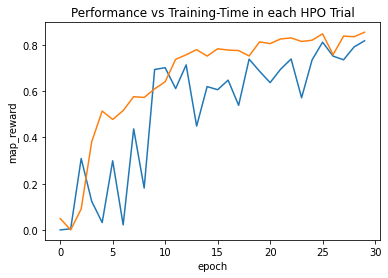

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> finish model fitting
The best config: {'lr.choice': 1, 'net.choice': 0}


In [6]:
time_limits = 20
epochs = 30
detector = task.fit(dataset_train,
                    num_trials=2,
                    epochs=epochs,
                    lr=ag.Categorical(5e-4, 1e-4),
                    ngpus_per_trial=1,
                    time_limits=time_limits)

In [7]:
dataset_test = task.Dataset(data_root, index_file_name='test', classes=('motorbike',))

test_map = detector.evaluate(dataset_test)
print("mAP on test dataset: {}".format(test_map[1][1]))

>>> create dataset(VOC format) 


mAP on test dataset: 0.7233451366388548


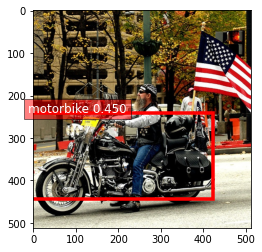

In [18]:
image = '000497.jpg'
image_path = os.path.join(data_root, 'JPEGImages', image)

ind, prob, loc = detector.predict(image_path)

In [16]:
 ! ls  tiny_motorbike/ImageSets/Main/test.txt

tiny_motorbike/ImageSets/Main/test.txt


In [0]:
savefile = 'model.pkl'
detector.save(savefile)

from autogluon import Detector
new_detector = Detector.load(savefile)

In [0]:
cat tiny_motorbike/ImageSets/Main/test.txt